In [11]:
#Creating machine learning model
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import pickle

from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import util
import preprocess

# import warnings
# warnings.filterwarnings("ignore")

In [12]:
# Read train/validate/test sets and preprocess each of them.
symmetriesTrain = pd.read_csv("symmetries.csv")
symmetriesValidate = pd.read_csv("symmetries2.csv")
symmetriesTest = pd.read_csv("symmetries3.csv")

data_train = symmetriesTrain
data_train = preprocess.preproccesData(data_train)
data_train['hasRotation'] = data_train['hasRotation'].astype('bool')
target_train = data_train["hasRotation"]

data_val = symmetriesValidate
data_val = preprocess.preproccesData(data_val)
data_val['hasRotation'] = data_val['hasRotation'].astype('bool')
target_val = data_val["hasRotation"]

data_test = symmetriesTest
data_test = preprocess.preproccesData(data_test)
data_test['hasRotation'] = data_test['hasRotation'].astype('bool')
target_test = data_test["hasRotation"]

M:\ProgramData\Miniconda3\envs\thesis\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Log_Regression 0.9167203903198242 seconds
Random_Forest 21.61308002471924 seconds
SVC 15968.097759962082 seconds
SVC_alt 5254.213588953018 seconds
KNearest_Neighbors 31.00262999534607 seconds
Decision_Tree 1.7129974365234375 seconds
SGDClassifier 1.819082260131836 seconds


M:\ProgramData\Miniconda3\envs\thesis\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC 108.43323087692261 seconds
true cases:  92160  ( 0.1781861209716712 %)
false cases:  425052  ( 0.8218138790283288 %)
('Log_Regression', 0.8218138790283288)
('Log_Regression', '0.9167203903198242 seconds')
('Log_Regression', <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x00000222AAB44F08>)
('Random_Forest', 0.853812363208897)
('Random_Forest', '21.61308002471924 seconds')
('Random_Forest', <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000002228D02D0C8>)
('SVC', 0.19588485959335825)
('SVC', '15968.097759962082 seconds')
('SVC', <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x00000222A2723BC8>)
('SVC_alt', 0.8888830885594302)
('SVC_alt', '5254.213588953018 seconds')
('SVC_alt', <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x00000222AD5E6F48>)
('KNearest_Neighbors', 0.8613063888695545)
('KNearest_Neighbors', '31.00262999534607 seconds')
('KNearest_Neighbors', <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x00000

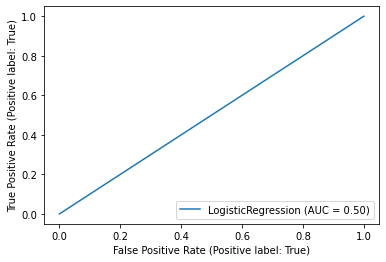

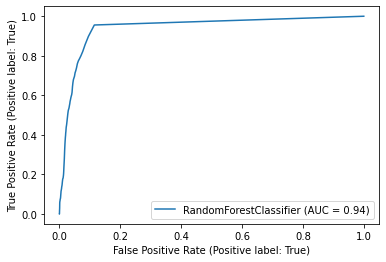

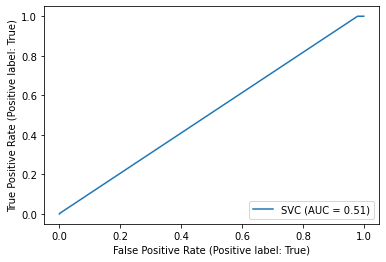

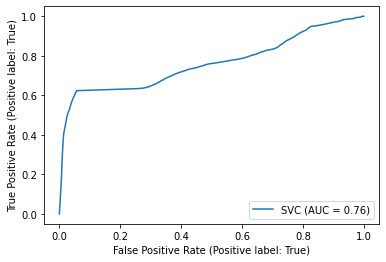

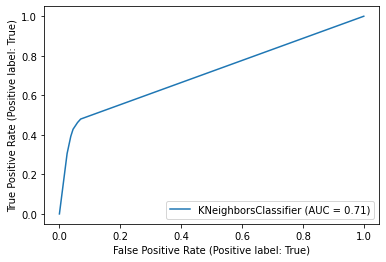

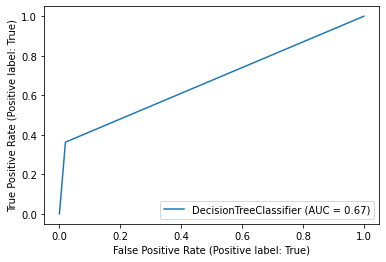

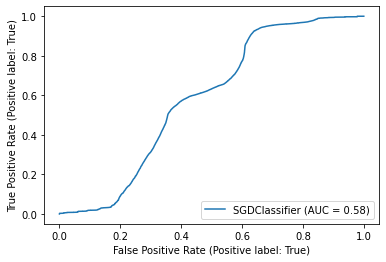

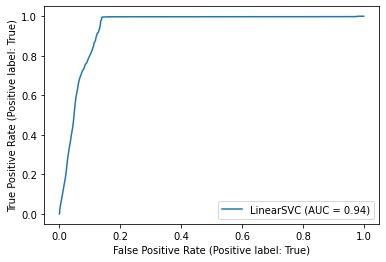

In [5]:
#Various algorithms trained on the training set and validated on the validation set.
X_train, y_train = data_train.drop('hasRotation',axis=1), target_train.to_numpy()
X_val, y_val = data_val.drop('hasRotation',axis=1), target_val.to_numpy()
# X_test, y_test = data_test.drop('hasRotation',axis=1), target_test.to_numpy()

models = []
models.append(("Log_Regression",LogisticRegression(class_weight="balanced", max_iter=10000, random_state=44)))
models.append(("Random_Forest",RandomForestClassifier(class_weight="balanced", random_state=44)))
models.append(("SVC",svm.SVC(class_weight="balanced", random_state=44)))
models.append(("SVC_alt",svm.SVC(class_weight="balanced", gamma="auto", random_state=44)))
models.append(("KNearest_Neighbors",KNeighborsClassifier()))
models.append(("Decision_Tree",DecisionTreeClassifier(class_weight="balanced", random_state=44)))
models.append(("SGDClassifier",SGDClassifier(class_weight="balanced", random_state=44)))
models.append(("LinearSVC",svm.LinearSVC(max_iter=5000, class_weight="balanced", random_state=44)))

results = []
for name, model in models:
    start_time = time.time()
    model = model.fit(X_train, y_train)
    res = model.score(X_val, y_val)
    curve = plot_roc_curve(model, X_val, y_val)
    results.append((name, res))
    results.append((name, "%s seconds" % (time.time() - start_time)))
    results.append((name, curve))
    print(name, "%s seconds" % (time.time() - start_time))


T = len(data_val[data_val["hasRotation"] == True])
F = len(data_val[data_val["hasRotation"] == False])
    
print("true cases: ", T, " (", T/(T+F),"%)")
print("false cases: ", F, " (", F/(T+F),"%)")

for res in results:
    print(res)

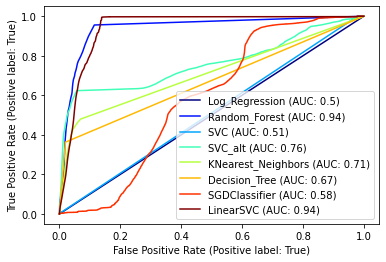

In [6]:
#Plotting ROC Curves

plt.viridis()
n = int(len(results) / 3)
colors = plt.cm.jet(np.linspace(0,1,n))
ax = plt.subplot()
j = 0
for i, res in enumerate(results, start=1):
    if not i % 3:
        auc, fpr, tpr = res[1].roc_auc, res[1].fpr, res[1].tpr
        plt.plot(fpr, tpr, color=colors[j], label=res[0] + " (AUC: " + str(round(auc, 2)) + ")")
        plt.xlabel('False Positive Rate (Positive label: True)')
        plt.ylabel('True Positive Rate (Positive label: True)')
        plt.legend()
        j = j + 1
plt.show()

M:\ProgramData\Miniconda3\envs\thesis\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC_0 378.79098677635193 seconds


M:\ProgramData\Miniconda3\envs\thesis\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC_1 322.91263699531555 seconds


M:\ProgramData\Miniconda3\envs\thesis\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC_2 313.4496080875397 seconds
LinearSVC_3 0.9549977779388428 seconds


M:\ProgramData\Miniconda3\envs\thesis\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC_4 69.69559383392334 seconds
LinearSVC_5 0.932999849319458 seconds
Random_Forest_0 23.286999940872192 seconds
Random_Forest_1 11.97959041595459 seconds
Random_Forest_2 57.32475233078003 seconds
Random_Forest_3 114.29022192955017 seconds
Random_Forest_4 22.480000019073486 seconds
Random_Forest_5 56.10041356086731 seconds
Random_Forest_6 12.991100311279297 seconds
Random_Forest_7 21.417108297348022 seconds
Random_Forest_8 23.567997217178345 seconds
Random_Forest_9 22.555004119873047 seconds
Random_Forest_10 23.273999214172363 seconds
Random_Forest_11 12.736050605773926 seconds
Random_Forest_12 13.542999744415283 seconds
Random_Forest_13 18.04159641265869 seconds


M:\ProgramData\Miniconda3\envs\thesis\lib\site-packages\sklearn\metrics\_plot\roc_curve.py:117: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Random_Forest_14 22.139034032821655 seconds
Random_Forest_15 12.560111045837402 seconds
Random_Forest_16 21.351997137069702 seconds
Random_Forest_17 21.85300040245056 seconds
Random_Forest_18 13.61900281906128 seconds
Random_Forest_19 21.076000213623047 seconds
KNearest_Neighbors_0 28.61799931526184 seconds
KNearest_Neighbors_1 22.10300040245056 seconds
KNearest_Neighbors_2 26.02212905883789 seconds
KNearest_Neighbors_3 31.67199730873108 seconds
KNearest_Neighbors_4 19.443029165267944 seconds
KNearest_Neighbors_5 16.71299982070923 seconds
KNearest_Neighbors_6 22.53699564933777 seconds
true cases:  92160  ( 0.1781861209716712 %)
false cases:  425052  ( 0.8218138790283288 %)
('LinearSVC_0', 0.8856561719372327)
('LinearSVC_0', '378.79098677635193 seconds')
('LinearSVC_0', <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000002228311FBC8>)
('LinearSVC_1', 0.8268988345204674)
('LinearSVC_1', '322.91263699531555 seconds')
('LinearSVC_1', <sklearn.metrics._plot.roc_curve.RocCurveD

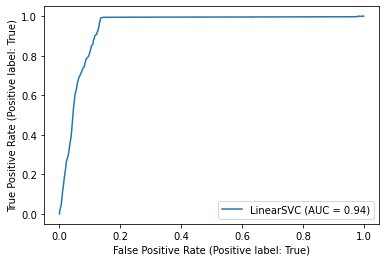

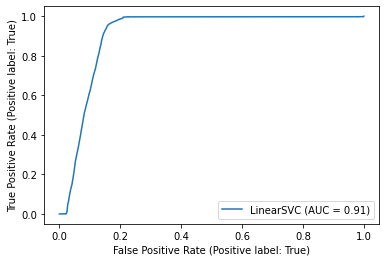

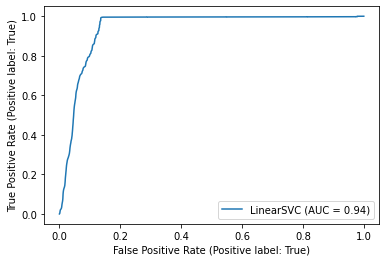

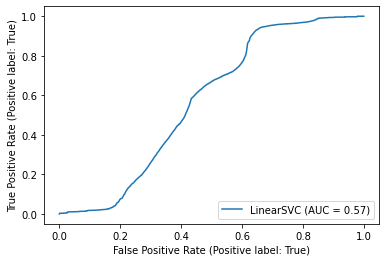

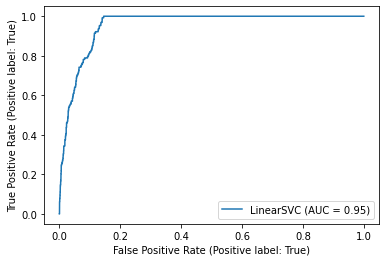

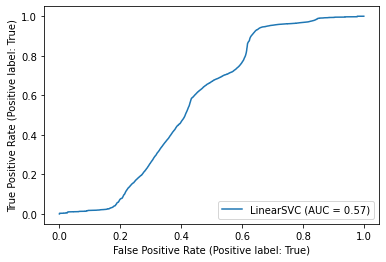

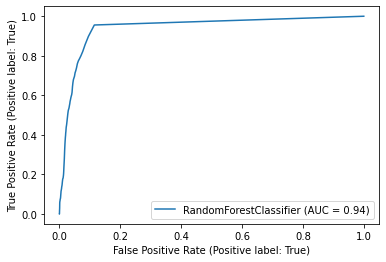

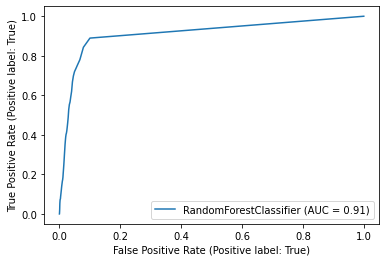

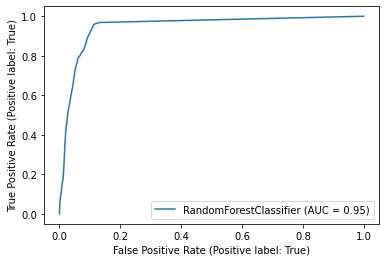

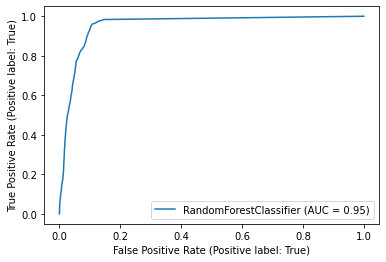

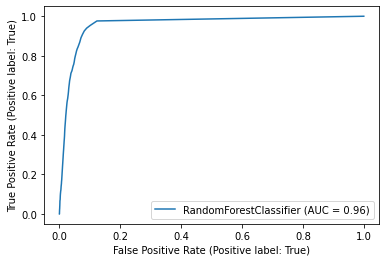

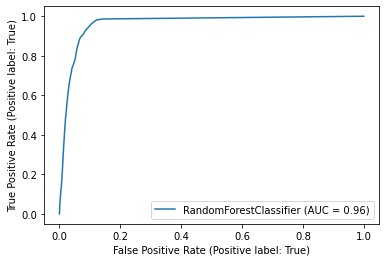

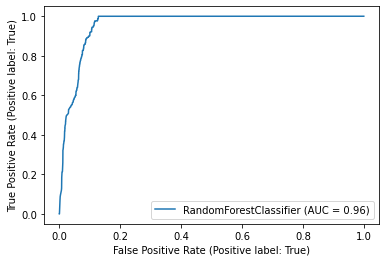

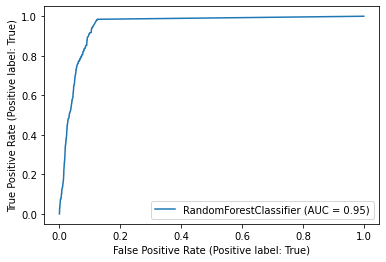

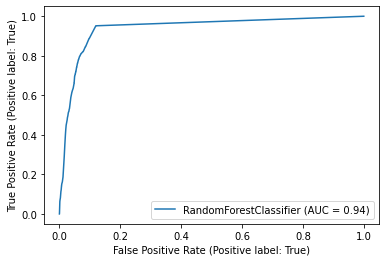

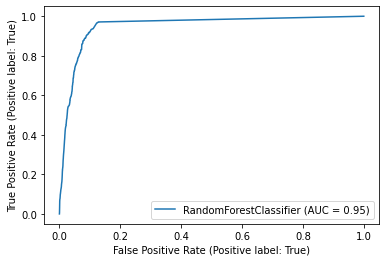

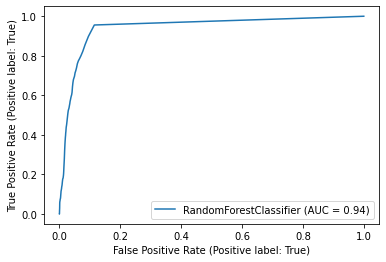

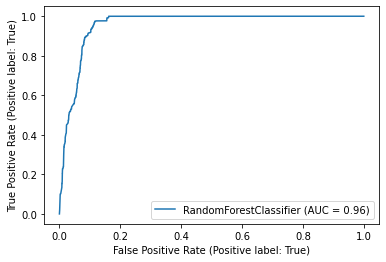

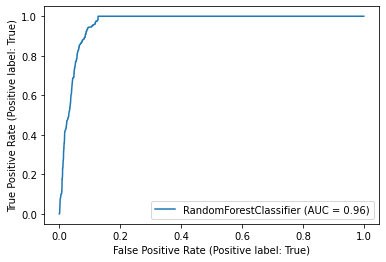

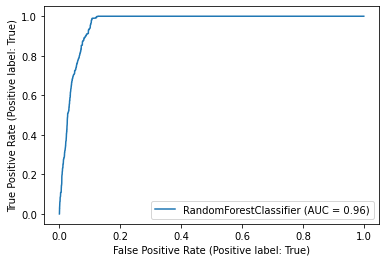

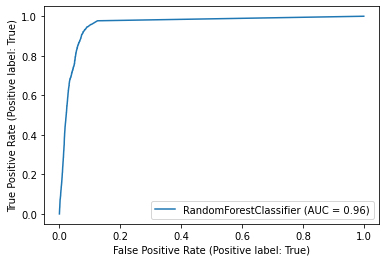

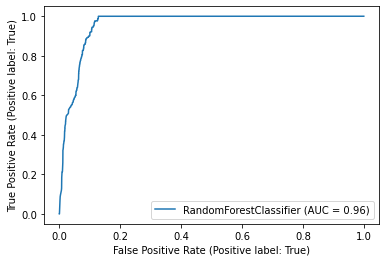

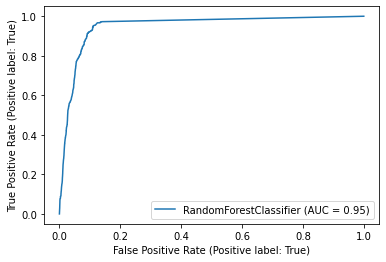

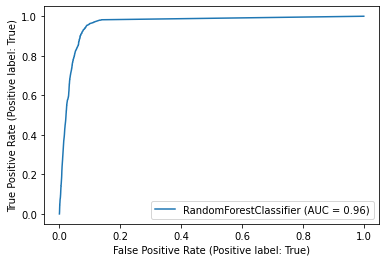

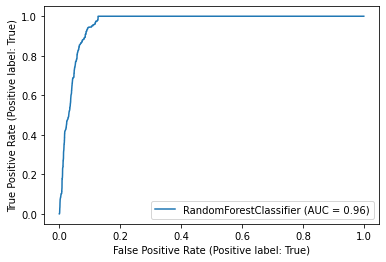

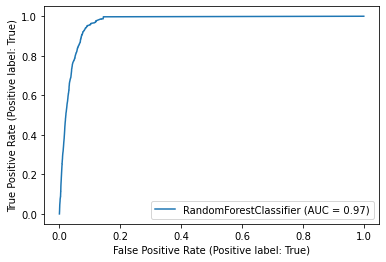

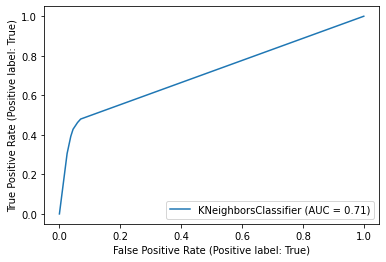

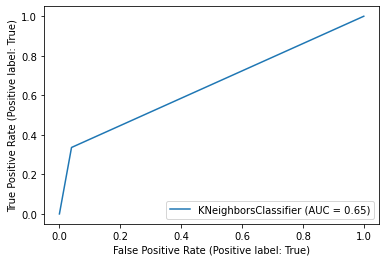

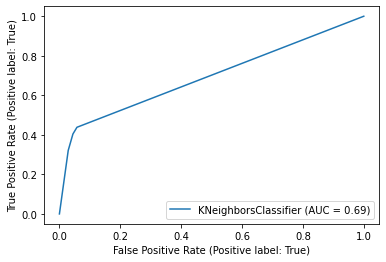

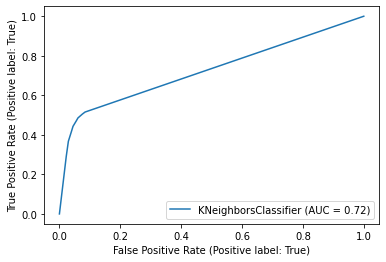

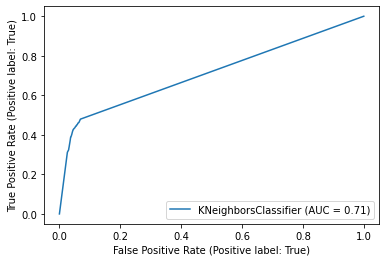

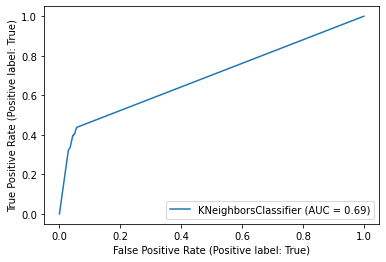

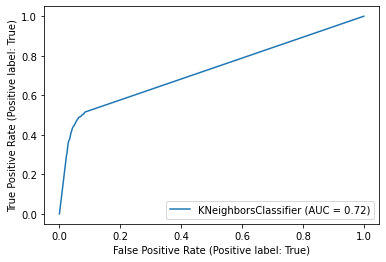

In [7]:
# Best performing algorithm with different parameters
X_train, y_train = data_train.drop('hasRotation',axis=1), target_train.to_numpy()
X_val, y_val = data_val.drop('hasRotation',axis=1), target_val.to_numpy()
# X_test, y_test = data_test.drop('hasRotation',axis=1), target_test.to_numpy()

models_param = []

models_param.append(("LinearSVC_0",svm.LinearSVC(max_iter=20000, class_weight="balanced", random_state=44)))
models_param.append(("LinearSVC_1",svm.LinearSVC(max_iter=20000, loss="hinge", class_weight="balanced", random_state=44)))
models_param.append(("LinearSVC_2",svm.LinearSVC(max_iter=20000, C=0.1, class_weight="balanced", random_state=44)))
models_param.append(("LinearSVC_3",svm.LinearSVC(max_iter=20000, dual=False, class_weight="balanced", random_state=44)))
models_param.append(("LinearSVC_4",svm.LinearSVC(max_iter=20000, dual=False, penalty="l1", class_weight="balanced", random_state=44)))
models_param.append(("LinearSVC_5",svm.LinearSVC(max_iter=20000, dual=False, C=10, class_weight="balanced", random_state=44)))

models_param.append(("Random_Forest_0",RandomForestClassifier(class_weight="balanced", random_state=44)))
models_param.append(("Random_Forest_1",RandomForestClassifier(class_weight="balanced", n_estimators=50, random_state=44)))
models_param.append(("Random_Forest_2",RandomForestClassifier(class_weight="balanced", n_estimators=250, random_state=44)))
models_param.append(("Random_Forest_3",RandomForestClassifier(class_weight="balanced", n_estimators=500, random_state=44)))
models_param.append(("Random_Forest_4",RandomForestClassifier(class_weight="balanced", criterion="entropy", random_state=44)))
models_param.append(("Random_Forest_5",RandomForestClassifier(class_weight="balanced", criterion="entropy", n_estimators=250, random_state=44)))
models_param.append(("Random_Forest_6",RandomForestClassifier(class_weight="balanced", max_depth=5, random_state=44)))
models_param.append(("Random_Forest_7",RandomForestClassifier(class_weight="balanced", max_depth=20, random_state=44)))
models_param.append(("Random_Forest_8",RandomForestClassifier(class_weight="balanced", min_samples_split=4, random_state=44)))
models_param.append(("Random_Forest_9",RandomForestClassifier(class_weight="balanced", min_samples_leaf=3, random_state=44)))
models_param.append(("Random_Forest_10",RandomForestClassifier(class_weight="balanced", max_features="log2", random_state=44)))
models_param.append(("Random_Forest_11",RandomForestClassifier(class_weight="balanced", max_leaf_nodes=10, random_state=44)))
models_param.append(("Random_Forest_12",RandomForestClassifier(class_weight="balanced", max_depth=5, criterion="entropy", random_state=44)))
models_param.append(("Random_Forest_13",RandomForestClassifier(class_weight="balanced", max_depth=10, criterion="entropy", random_state=44)))
models_param.append(("Random_Forest_14",RandomForestClassifier(class_weight="balanced", max_depth=20, criterion="entropy", random_state=44)))
models_param.append(("Random_Forest_15",RandomForestClassifier(class_weight="balanced", min_samples_leaf=3, max_depth=5, random_state=44)))
models_param.append(("Random_Forest_16",RandomForestClassifier(class_weight="balanced", min_samples_leaf=3, max_depth=20, random_state=44)))
models_param.append(("Random_Forest_17",RandomForestClassifier(class_weight="balanced", min_samples_leaf=3, criterion="entropy", random_state=44)))
models_param.append(("Random_Forest_18",RandomForestClassifier(class_weight="balanced", min_samples_leaf=3, criterion="entropy", max_depth=5, random_state=44)))
models_param.append(("Random_Forest_19",RandomForestClassifier(class_weight="balanced", min_samples_leaf=3, criterion="entropy", max_depth=20, random_state=44)))

models_param.append(("KNearest_Neighbors_0",KNeighborsClassifier()))
models_param.append(("KNearest_Neighbors_1",KNeighborsClassifier(n_neighbors=1)))
models_param.append(("KNearest_Neighbors_2",KNeighborsClassifier(n_neighbors=3)))
models_param.append(("KNearest_Neighbors_3",KNeighborsClassifier(n_neighbors=8)))
models_param.append(("KNearest_Neighbors_4",KNeighborsClassifier(weights="distance")))
models_param.append(("KNearest_Neighbors_5",KNeighborsClassifier(weights="distance", n_neighbors=3)))
models_param.append(("KNearest_Neighbors_6",KNeighborsClassifier(weights="distance", n_neighbors=8)))

results_param = []
for name, model in models_param:
    start_time = time.time()
    model = model.fit(X_train, y_train)
    res = model.score(X_val, y_val)
    curve = plot_roc_curve(model, X_val, y_val)
    results_param.append((name, res))
    results_param.append((name, "%s seconds" % (time.time() - start_time)))
    results_param.append((name, curve))
    print(name, "%s seconds" % (time.time() - start_time))


T = len(data_val[data_val["hasRotation"] == True])
F = len(data_val[data_val["hasRotation"] == False])
    
print("true cases: ", T, " (", T/(T+F),"%)")
print("false cases: ", F, " (", F/(T+F),"%)")

for res in results_param:
    print(res)

In [8]:
# Best performing algorithm with different parameters
X_train, y_train = data_train.drop('hasRotation',axis=1), target_train.to_numpy()
X_val, y_val = data_val.drop('hasRotation',axis=1), target_val.to_numpy()
# X_test, y_test = data_test.drop('hasRotation',axis=1), target_test.to_numpy()

models_param_extra = []

models_param_extra.append(("SVC_0",svm.SVC(class_weight="balanced", gamma="auto", random_state=44)))
models_param_extra.append(("SVC_1",svm.SVC(kernel="poly", class_weight="balanced", gamma="auto", random_state=44)))
models_param_extra.append(("SVC_2",svm.SVC(kernel="sigmoid", class_weight="balanced", gamma="auto", random_state=44)))
# models_param_extra.append(("SVC_3",svm.SVC(kernel="precomputed", class_weight="balanced", random_state=44)))

results_param_extra = []
for name, model in models_param_extra:
    start_time = time.time()
    model = model.fit(X_train, y_train)
    res = model.score(X_val, y_val)
    roc = roc_auc_score(y_val, model.predict(X_val))
    results_param_extra.append((name, roc))
    results_param_extra.append((name, "%s seconds" % (time.time() - start_time)))
    results_param_extra.append((name, res))
    print(name, "%s seconds" % (time.time() - start_time))


T = len(data_val[data_val["hasRotation"] == True])
F = len(data_val[data_val["hasRotation"] == False])
    
print("true cases: ", T, " (", T/(T+F),"%)")
print("false cases: ", F, " (", F/(T+F),"%)")

for res in results_param_extra:
    print(res)

SVC_0 4968.117491483688 seconds
SVC_1 178.11706256866455 seconds
SVC_2 5713.685707092285 seconds
true cases:  92160  ( 0.1781861209716712 %)
false cases:  425052  ( 0.8218138790283288 %)
('SVC_0', 0.7499848777693671)
('SVC_0', '4968.117491483688 seconds')
('SVC_0', 0.8888830885594302)
('SVC_1', 0.5)
('SVC_1', '178.11706256866455 seconds')
('SVC_1', 0.1781861209716712)
('SVC_2', 0.421156225811783)
('SVC_2', '5713.685707092285 seconds')
('SVC_2', 0.31574093408505605)


Random_Forest_13 61.439404010772705 seconds
Random_Forest_19 78.70321750640869 seconds


M:\ProgramData\Miniconda3\envs\thesis\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC_0 1783.2964005470276 seconds


M:\ProgramData\Miniconda3\envs\thesis\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC_4 360.31363010406494 seconds
true cases:  60480  ( 0.22946639956292114 %)
false cases:  203088  ( 0.7705336004370789 %)
('Random_Forest_13', 0.973475535725126)
('Random_Forest_13', '61.439404010772705 seconds')
('Random_Forest_13', <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x00000222BAA39288>)
('Random_Forest_19', 0.8745181509136162)
('Random_Forest_19', '78.70321750640869 seconds')
('Random_Forest_19', <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x00000222BF707DC8>)
('LinearSVC_0', 0.9298966490621016)
('LinearSVC_0', '1783.2964005470276 seconds')
('LinearSVC_0', <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x00000222C6993F88>)
('LinearSVC_4', 0.9219138893947671)
('LinearSVC_4', '360.31363010406494 seconds')
('LinearSVC_4', <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x00000222ABD71B08>)


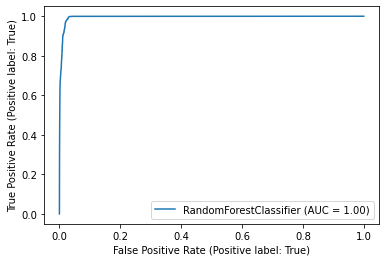

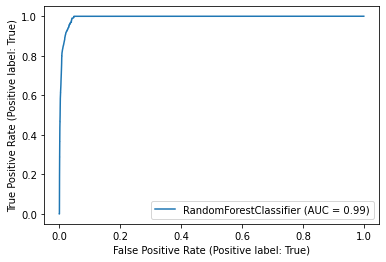

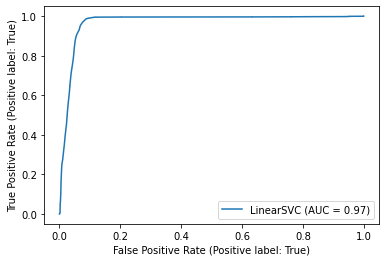

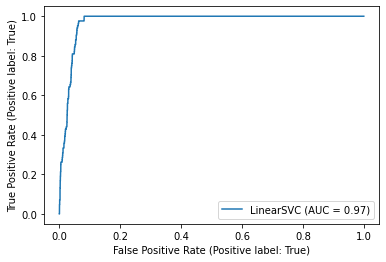

In [9]:
# Best performing algorithm with different parameters
X_train, y_train = data_train.drop('hasRotation',axis=1), target_train
X_val, y_val = data_val.drop('hasRotation',axis=1), target_val
X_test, y_test = data_test.drop('hasRotation',axis=1), target_test

X_train = pd.concat([X_train, X_val], ignore_index=True)
y_train = pd.concat([y_train, y_val], ignore_index=True)

models_test = []

models_test.append(("Random_Forest_13",RandomForestClassifier(class_weight="balanced", max_depth=10, criterion="entropy", random_state=44)))
models_test.append(("Random_Forest_19",RandomForestClassifier(class_weight="balanced", min_samples_leaf=3, criterion="entropy", max_depth=20, random_state=44)))

models_test.append(("LinearSVC_0",svm.LinearSVC(max_iter=20000, class_weight="balanced", random_state=44)))
models_test.append(("LinearSVC_4",svm.LinearSVC(max_iter=20000, dual=False, penalty="l1", class_weight="balanced", random_state=44)))

results_test = []
for name, model in models_test:
    start_time = time.time()
    model = model.fit(X_train, y_train)
    res = model.score(X_test, y_test)
    curve = plot_roc_curve(model, X_test, y_test)
    results_test.append((name, res))
    results_test.append((name, "%s seconds" % (time.time() - start_time)))
    results_test.append((name, curve))
    print(name, "%s seconds" % (time.time() - start_time))


T = len(data_test[data_test["hasRotation"] == True])
F = len(data_test[data_test["hasRotation"] == False])
    
print("true cases: ", T, " (", T/(T+F),"%)")
print("false cases: ", F, " (", F/(T+F),"%)")

for res in results_test:
    print(res)

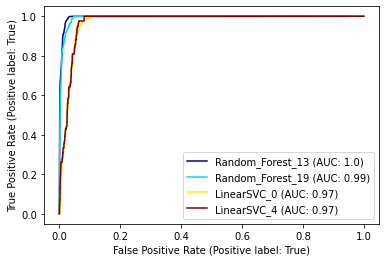

In [10]:
#Plotting ROC Curves

plt.viridis()
n = int(len(results_test) / 3)
colors = plt.cm.jet(np.linspace(0,1,n))
ax = plt.subplot()
j = 0
for i, res in enumerate(results_test, start=1):
    if not i % 3:
        auc, fpr, tpr = res[1].roc_auc, res[1].fpr, res[1].tpr
        plt.plot(fpr, tpr, color=colors[j], label=res[0] + " (AUC: " + str(round(auc, 2)) + ")")
        plt.xlabel('False Positive Rate (Positive label: True)')
        plt.ylabel('True Positive Rate (Positive label: True)')
        plt.legend()
        j = j + 1
plt.show()

In [13]:
X_train, y_train = data_train.drop('hasRotation',axis=1), target_train
X_val, y_val = data_val.drop('hasRotation',axis=1), target_val
X_test, y_test = data_test.drop('hasRotation',axis=1), target_test

# X_train = pd.concat([X_train, X_val], ignore_index=True)
# y_train = pd.concat([y_train, y_val], ignore_index=True)

X_train = pd.concat([X_train, X_val, X_test], ignore_index=True)
y_train = pd.concat([y_train, y_val, y_test], ignore_index=True)

model_final = RandomForestClassifier(class_weight="balanced", max_depth=10, criterion="entropy", random_state=44)

modelFileName = "models/RF-trainValTest.pkl"

model_final = model_final.fit(X_train, y_train)

with open(modelFileName, 'wb') as file:
    pickle.dump(model_final, file)